In [1]:
import tensorflow as tf
import matplotlib.pyplot as plt
import os
import seaborn as sns
from sklearn.metrics import confusion_matrix
import shutil
import numpy as np

C:\Users\victo\anaconda3\lib\site-packages\scipy\__init__.py:146: UserWarning: A NumPy version >=1.16.5 and <1.23.0 is required for this version of SciPy (detected version 1.26.4
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"


In [2]:
batch_size = 32
image_size = (224, 224)   

In [3]:
#Código para leer las imágenes: Data set de entrenamiento
train_ds = tf.keras.preprocessing.image_dataset_from_directory(
                'C:/Users/victo/OneDrive/Fisica/Cuarto de carrera/TFG/Train_Val',     #Directorio donde se encuentran
                labels='inferred',                      #Para tomar cada subdirectorio como una clase diferente
                label_mode='int',                       #Las etiquetas son numeros enteros
                validation_split=0.1,                   #90% datos entrenamiento, 10% validación
                subset="training",                      #Asignamos que este data set es de entrenamiento
                seed=20220331,                          #Variable relacionada con la aleatoriedad
                image_size=image_size,                  #Tamaño de las imágenes
                batch_size=batch_size,                  #Tamaño de los lotes de entrenamiento
            )

Found 630 files belonging to 9 classes.
Using 567 files for training.


In [4]:
#Código para leer las imágenes: Data set de validación
val_ds = tf.keras.preprocessing.image_dataset_from_directory(
                'C:/Users/victo/OneDrive/Fisica/Cuarto de carrera/TFG/Train_Val',
                labels='inferred',
                label_mode='int',
                validation_split=0.1,
                subset="validation",
                seed=20220331,
                image_size=image_size,
                batch_size=batch_size,
            )

Found 630 files belonging to 9 classes.
Using 63 files for validation.


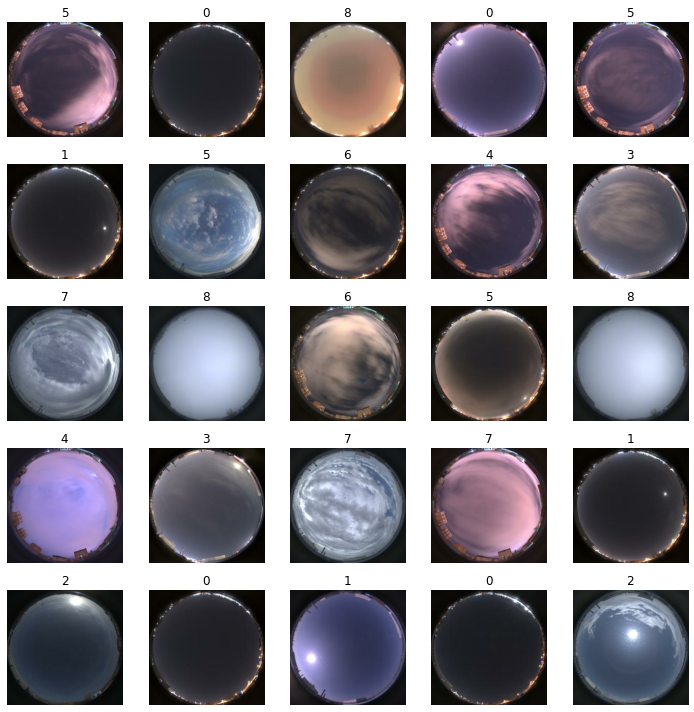

In [5]:
# Obtener un lote de datos de validación
for imagenes, etiquetas in train_ds.take(1):
    # Crear una nueva figura
    plt.figure(figsize=(10, 10))

    # Iterar sobre las primeras 25 imágenes y etiquetas en el lote
    for i in range(25):
        # Obtener la imagen y la etiqueta correspondiente
        imagen = imagenes[i]
        etiqueta = etiquetas[i]

        # Convertir la etiqueta a una cadena si es necesario
        etiqueta = str(etiqueta.numpy()) if isinstance(etiqueta, tf.Tensor) else str(etiqueta)

        # Añadir una subparcela a la figura
        plt.subplot(5, 5, i + 1)
        plt.imshow(imagen.numpy().astype("uint8"))  # Mostrar la imagen como una matriz numpy
        plt.title(etiqueta)                         # Mostrar la etiqueta como título
        plt.axis("off")                             # Desactivar ejes

    # Ajustar el diseño y mostrar la figura
    plt.tight_layout()
    plt.show()

In [6]:
#funciones de perdida
#categorical corss entropy
loss=tf.losses.SparseCategoricalCrossentropy() #num_classes = 9
"""
loss='mae' #num_classes = 1
loss='mse' #num_classes = 1
"""

"\nloss='mae' #num_classes = 1\nloss='mse' #num_classes = 1\n"

In [7]:
#funciones de activación:
acti='relu'
#acti='tanh'

#Valor del drop
drop = 0.5
#Numero clases:
num_classes = 9

In [8]:
# Definición del modelo
model = tf.keras.models.Sequential()

model.add(tf.keras.layers.Conv2D(32, (3, 3), activation='relu', input_shape=(224, 224, 3)))
model.add(tf.keras.layers.MaxPooling2D(2, 2))
model.add(tf.keras.layers.Conv2D(64, (3, 3), activation='relu'))
model.add(tf.keras.layers.MaxPooling2D(2, 2))
model.add(tf.keras.layers.Flatten())
model.add(tf.keras.layers.Dense(128, activation='relu'))
model.add(tf.keras.layers.Dense(10, activation='softmax'))
tf.keras.layers.Dense(num_classes, activation='softmax')  # Num_classes es el número de clases de salida

C:\Users\victo\anaconda3\lib\site-packages\keras\src\layers\convolutional\base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


<Dense name=dense_2, built=False>

In [9]:
#optimizers
#Descenso del gradiente
#lr_schedule = 0.05
#optimizer = tf.keras.optimizers.SGD(learning_rate=lr_schedule)
#Optimizador adam
optimizer ='adam'

In [10]:
# Directorio donde se guarda el modelo
copia_modelo = 'modelos/BACKUP_4.keras'

In [11]:
#compilar
model.compile(optimizer='adam', loss=loss, metrics=['accuracy'])

In [12]:
#PARA OTRAS FUNCIONES (CALLBACKS)

# Para otros callbacks
# Guarda el último modelo con el mejor ajuste en val_ts
checkpoint = tf.keras.callbacks.ModelCheckpoint(
    copia_modelo,
    monitor="val_loss",
    verbose=1,
    save_best_only=True,
    save_weights_only=False,
    mode="auto"
)
shutil.rmtree('C:/Users/victo/OneDrive/Fisica/Cuarto de carrera/TFG/log.txt') 
os.makedirs('C:/Users/victo/OneDrive/Fisica/Cuarto de carrera/TFG/log.txt')
# Guarda la información de cada época, residuos, etc.
csv_logger = tf.keras.callbacks.CSVLogger(
    'log.txt',
    append=True,
    separator=','
)

In [13]:
#TE PARA LAS EPOCAS SI NO MEJORA EN 10 EPOCAS, y TE REDUCE LA LR SI NO MEJORA EN 5
early_stopping = tf.keras.callbacks.EarlyStopping(monitor="val_loss", patience=10)
reduce_lr = tf.keras.callbacks.ReduceLROnPlateau(monitor="val_loss", patience=5)

In [14]:
#ENTRENAR MODELO:
data_trainining = (train_ds)
model.fit(
    data_trainining,
    validation_data=val_ds,
    shuffle=True,
    epochs=300,
    callbacks=[checkpoint,early_stopping, reduce_lr,csv_logger],
)

Epoch 1/300
18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 1s/step - accuracy: 0.1445 - loss: 1169.2856
Epoch 1: val_loss improved from inf to 2.21637, saving model to modelos/BACKUP_4.keras
18/18 ━━━━━━━━━━━━━━━━━━━━ 66s 4s/step - accuracy: 0.1450 - loss: 1143.0392 - val_accuracy: 0.2540 - val_loss: 2.2164 - learning_rate: 0.0010
Epoch 2/300
18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 1s/step - accuracy: 0.1730 - loss: 2.2494
Epoch 2: val_loss did not improve from 2.21637
18/18 ━━━━━━━━━━━━━━━━━━━━ 19s 1s/step - accuracy: 0.1731 - loss: 2.2497 - val_accuracy: 0.1429 - val_loss: 2.2560 - learning_rate: 0.0010
Epoch 3/300
18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 961ms/step - accuracy: 0.1970 - loss: 2.2463
Epoch 3: val_loss improved from 2.21637 to 2.19078, saving model to modelos/BACKUP_4.keras
18/18 ━━━━━━━━━━━━━━━━━━━━ 54s 3s/step - accuracy: 0.1974 - loss: 2.2455 - val_accuracy: 0.1429 - val_loss: 2.1908 - learning_rate: 0.0010
Epoch 4/300
18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 1s/step - accuracy: 0.2233 - loss: 2.1532
Epoch 4: val_

In [15]:
# Carga el modelo guardado
modelo = tf.keras.models.load_model(copia_modelo)
# Muestra un resumen del modelo
modelo.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                 │ (None, 222, 222, 32)   │           896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d (MaxPooling2D)    │ (None, 111, 111, 32)   │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_1 (Conv2D)               │ (None, 109, 109, 64)   │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_1 (MaxPooling2D)  │ (None, 54, 54, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 186624)         │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 128)            │    23,888,000 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 10)             │         1,290 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 71,726,048 (273.61 MB)

 Trainable params: 23,908,682 (91.20 MB)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 47,817,366 (182.41 MB)

In [16]:
#Cargamos el data set Test:
test_ds = tf.keras.preprocessing.image_dataset_from_directory(
                'C:/Users/victo/OneDrive/Fisica/Cuarto de carrera/TFG/Test',  # Directorio donde se encuentran los datos de prueba
                labels='inferred',                      # Para tomar cada subdirectorio como una clase diferente
                label_mode='int',                       # Las etiquetas son números enteros
                seed=20220331,                          # Variable relacionada con la aleatoriedad
                image_size=image_size,                  # Tamaño de las imágenes
                batch_size=batch_size,                  # Tamaño de los lotes de prueba
            )

Found 2565 files belonging to 9 classes.


In [17]:
# Evaluar el modelo en el conjunto de datos de prueba
test_loss, test_accuracy = model.evaluate(test_ds)

# Imprimir la precisión en el conjunto de datos de prueba
print("Precisión en el conjunto de datos de prueba:", test_accuracy)

81/81 ━━━━━━━━━━━━━━━━━━━━ 15s 189ms/step - accuracy: 0.7407 - loss: 0.8544
Precisión en el conjunto de datos de prueba: 0.7290448546409607


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 482ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 173ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 263ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 251ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 227ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 161ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 164ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 175ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 174ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 168ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 180ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 220ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 172ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 176ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 177ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 177ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 193ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 390ms/step


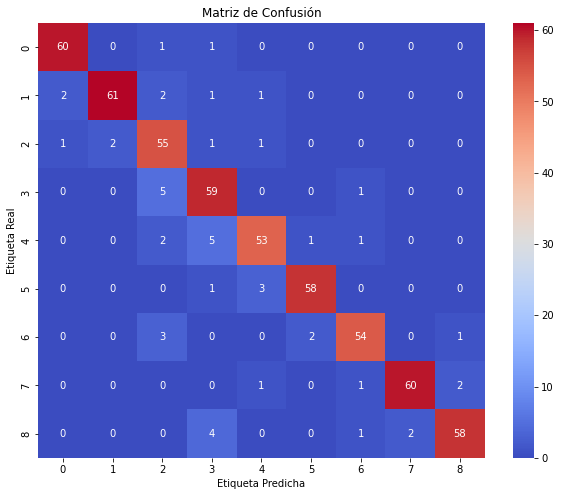

In [18]:
# Matriz de confusion datos de entrenamiento
true_labels = []
predicted_labels = []

for images, labels in train_ds:
    true_labels.extend(labels.numpy())
    predicted_labels.extend(np.argmax(model.predict(images), axis=-1))

# Calcular la matriz de confusión
conf_matrix = confusion_matrix(true_labels, predicted_labels)

# Visualizar la matriz de confusión
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 8))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='coolwarm')
plt.xlabel('Etiqueta Predicha')
plt.ylabel('Etiqueta Real')
plt.title('Matriz de Confusión')
plt.show()

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 205ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 318ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 170ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 193ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 211ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 208ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 220ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 213ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 195ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 188ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 197ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 191ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 165ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 174ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 198ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 191ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 174ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 174ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 215ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 203ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 224ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 174ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 172ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 183ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 174ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 

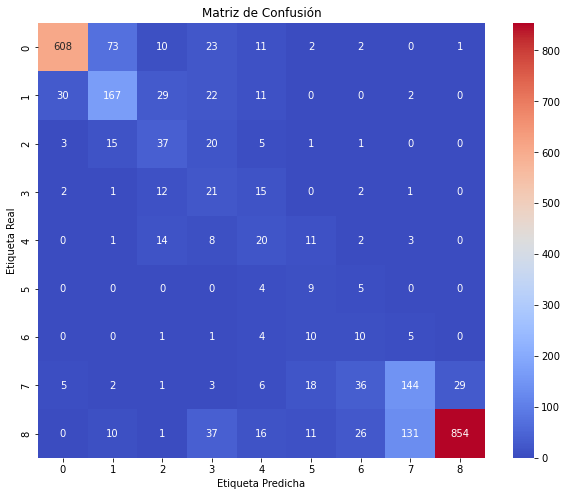

In [19]:
# Matriz de confusion datos test
true_labels = []
predicted_labels = []

for images, labels in test_ds:
    true_labels.extend(labels.numpy())
    predicted_labels.extend(np.argmax(model.predict(images), axis=-1))

# Calcular la matriz de confusión
conf_matrix = confusion_matrix(true_labels, predicted_labels)

# Visualizar la matriz de confusión
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 8))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='coolwarm')
plt.xlabel('Etiqueta Predicha')
plt.ylabel('Etiqueta Real')
plt.title('Matriz de Confusión')
plt.show()